In [1]:
from matplotlib import pyplot as plt
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import numpy as np



In [2]:
from pathlib import Path
import pandas as pd
pd.options.mode.chained_assignment = None
import tabular_data as td

df = pd.read_csv(Path('AirbnbDataSci/tabular_data/AirBnbData.csv'))
df = td.clean_tabular_data(df)
#print(df)

features, labels = td.load_airbnb(df, "Price_Night")
#print(features)
#print(labels)

In [3]:
#scaling the data
scaler = StandardScaler()
features = scaler.fit_transform(features)
print(features)

[[-0.8058115  -0.7732395  -0.45534403 ... -2.68255683 -1.58317217
  -0.61251226]
 [-0.38490304  0.31361704 -1.66862026 ... -1.53869751 -1.93496937
  -0.61251226]
 [ 0.03600542 -0.22981123  0.15129408 ... -0.39483819  1.09048655
  -0.61251226]
 ...
 [ 0.03600542 -0.22981123  0.15129408 ...  0.17709147  0.17581383
   0.33068844]
 [ 0.87782234  0.31361704  0.7579322  ... -0.39483819 -0.80921833
   0.33068844]
 [ 0.03600542 -0.22981123 -0.45534403 ... -2.68255683 -0.45742113
   0.33068844]]


In [4]:
df.describe()

,guests,beds,bathrooms,Price_Night,Cleanliness_rate,Accuracy_rate,Communication_rate,Location_rate,Check-in_rate,Value_rate,amenities_count,bedrooms
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,3.914458,2.422892,1.375301,154.172289,4.853735,4.906024,4.933614,4.904819,4.944578,4.769036,35.501205,1.649398
std,2.377246,1.841279,0.824712,129.082913,0.182012,0.129999,0.121769,0.120717,0.103908,0.174952,14.221304,1.060859
min,1.000000,1.000000,0.000000,8.000000,3.800000,4.000000,3.900000,4.000000,3.900000,3.700000,3.000000,1.000000
25%,2.000000,1.000000,1.000000,83.250000,4.800000,4.900000,4.900000,4.900000,4.900000,4.700000,25.000000,1.000000
50%,4.000000,2.000000,1.000000,120.000000,4.900000,4.900000,5.000000,4.900000,5.000000,4.800000,35.000000,1.000000
75%,5.000000,3.000000,1.500000,176.750000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,44.000000,2.000000
max,16.000000,17.000000,10.000000,1132.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,84.000000,10.000000


Linear regression

In [5]:
from sklearn.model_selection import train_test_split
#define the features as generated from load_airbnb as X
X = features
#define the labels as generated from load_airbnb as y
y = labels
#split the data into test and train data; the 0.3 describes the data which is apportioned to the test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)
#print(y_train)
#resplit the test data again to get a final 15 % for both test and validation
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
#import the linear regression model as model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#fit the model using the training data (holding back the test and validation)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_validation_pred = model.predict(X_validation)
y_test_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

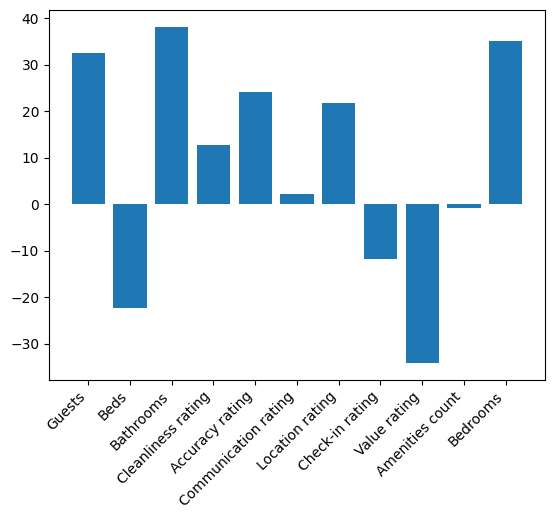

In [6]:
names = ["Guests", "Beds", "Bathrooms", "Cleanliness rating", "Accuracy rating", "Communication rating", "Location rating", "Check-in rating", "Value rating", "Amenities count", "Bedrooms"] 
coefficients = model.coef_ 
plt.bar(names, coefficients)
#imagine there is a box around the words in the rotated x labels, ha is the alignment you want. In this case right
plt.xticks(rotation=45, ha="right")
plt.show 

In [7]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

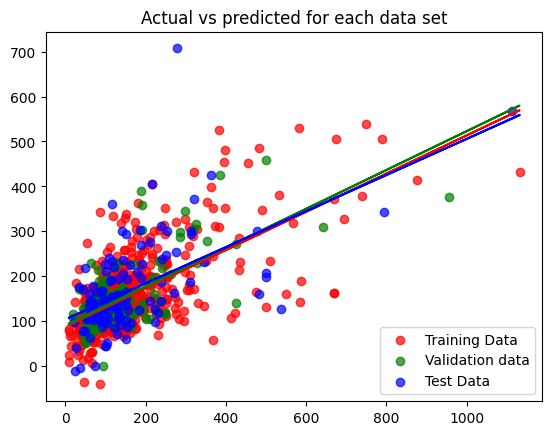

In [8]:
#plotting the actual by predicted
# polyfit to generate line of best fit
b, m = polyfit(y_train, y_train_pred, 1)
plt.plot(y_train, b + m * y_train, '-', color = 'r')

b, m = polyfit(y_validation, y_validation_pred, 1)
plt.plot(y_train, b + m * y_train, '-', color = 'g')

b, m = polyfit(y_test, y_test_pred, 1)
plt.plot(y_train, b + m * y_train, '-', color ='b')

plt.scatter(y_train, y_train_pred, label='Training Data', color = 'r', alpha=.7)
plt.scatter(y_validation, y_validation_pred, label='Validation data', color = 'g', alpha=.7)
plt.scatter(y_test, y_test_pred, label='Test Data', color = 'b', alpha=.7)
plt.legend()
plt.title("Actual vs predicted for each data set")
plt.show()

In [9]:
train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, shuffle=True, random_state=42)

[learning_curve] Training set sizes: [ 46 150 255 359 464]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.0s finished


In [10]:
#take an average of all of the train cv scores at different training sizes
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)



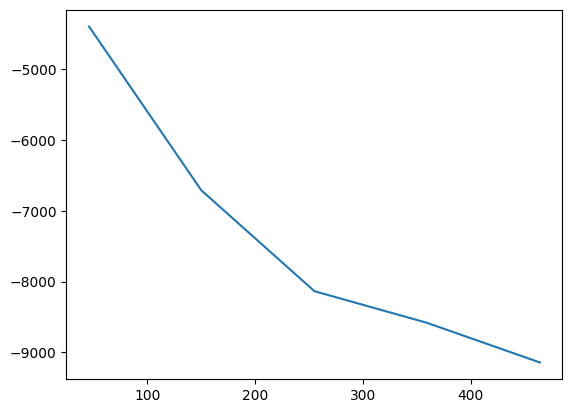

In [11]:
plt.plot(train_sizes, train_mean)
plt.show()

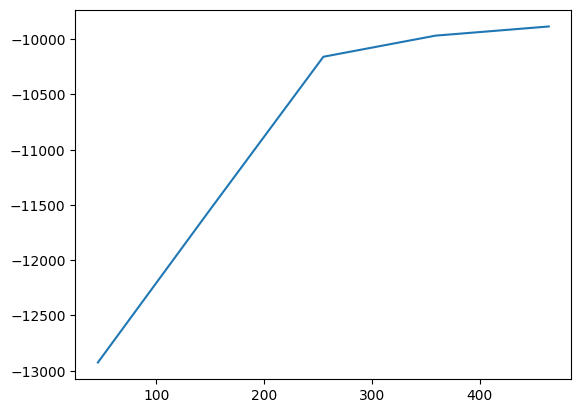

In [12]:
plt.plot(train_sizes, test_mean)
plt.show()

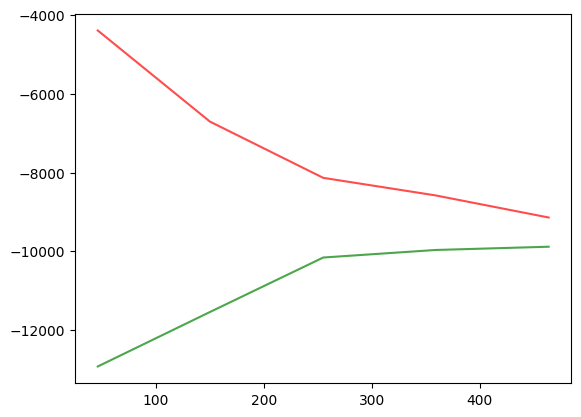

In [13]:
plt.plot(train_sizes, train_mean, color='r', label='Training Data', alpha=.7)
plt.plot(train_sizes, test_mean, color='g', label='Test Data', alpha=.7)

In [14]:
from sklearn.model_selection import train_test_split
#define the features as generated from load_airbnb as X
X = features
#define the labels as generated from load_airbnb as y
y = labels
#split the data into test and train data; the 0.3 describes the data which is apportioned to the test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#print(y_train)
#resplit the test data again to get a final 15 % for both test and validation
#X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
#import the linear regression model as model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#fit the model using the training data (holding back the test and validation)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
#y_validation_pred = model.predict(X_validation)
y_test_pred = model.predict(X_test)

In [15]:
def get_loss_curves(model, n_epochs):
    train_errors = []
    test_errors = []
    n_epochs = n_epochs

    for epoch in range(n_epochs):
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        train_errors.append(mean_squared_error(y_train, y_train_pred))
        
        y_test_pred = model.predict(X_test)
        test_errors.append(mean_squared_error(y_test, y_test_pred))

    # get the epoch with the lowest score
    best_epoch = np.argmin(test_errors)
    best_test_rmse = np.sqrt(test_errors[best_epoch])

    plt.plot([0, n_epochs], [best_test_rmse, best_test_rmse], "k:", linewidth=2)
    plt.plot(np.sqrt(test_errors), "b-",  linewidth=3, label = "Validation set")
    plt.plot(np.sqrt(train_errors), "r--",  linewidth=2, label = "Training set")
    plt.legend(loc="upper right", fontsize=14)
    #plt.ylim(1.3, 2.5)
    plt.xlabel("Num_epochs", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.show()



        

c:\Users\marko\DS Projects\AirBnB-Data-Modelling\main project file\AirBnB_project_venv.venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\marko\DS Projects\AirBnB-Data-Modelling\main project file\AirBnB_project_venv.venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\marko\DS Projects\AirBnB-Data-Modelling\main project file\AirBnB_project_venv.venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\marko\DS Projects\AirBnB-Data-Modelling\main project file\AirBnB_project_venv.venv

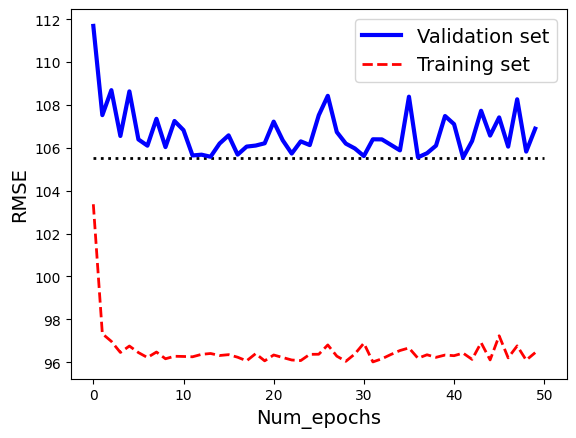

In [16]:
#SGDRegressor
#because the normal linear regression model uses the analytical method to fit the model, this is not suitable for iterative 
# optimisation (required for loss_curve). Accordingly, SGDregression (stochastic gradient descent, i.e. fit using gradient
# descent not analytical method)
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(
    max_iter=1, #only 1 optimisation step per iteration
    tol=np.infty, #only stop when loss is less than neg infinity i.e. never
    warm_start = True #build on previous iterations (would constantly reset to untrained otherwise)

)

get_loss_curves(sgd_model, 50)
